# Problem 0: Metrics vs Loss functions
### As we said in lecture, we optimize (minimize) the loss function, but monitor metrics without letting the model know about their value.

### A very common loss/metric pair is crossentropy for the loss and accuracy for the metric. Often, these two numbers correlate, but they are not guaranteed to do some.

### In this problem, you will come up with 3 sets of 20 synthetic values for predicted probability in a binary classification problem where the crossentropy and accuracy are anti correlated. Plot the loss vs the accuracy.

In [1]:
# safe to restart
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

Text(0, 0.5, 'Accuracy')

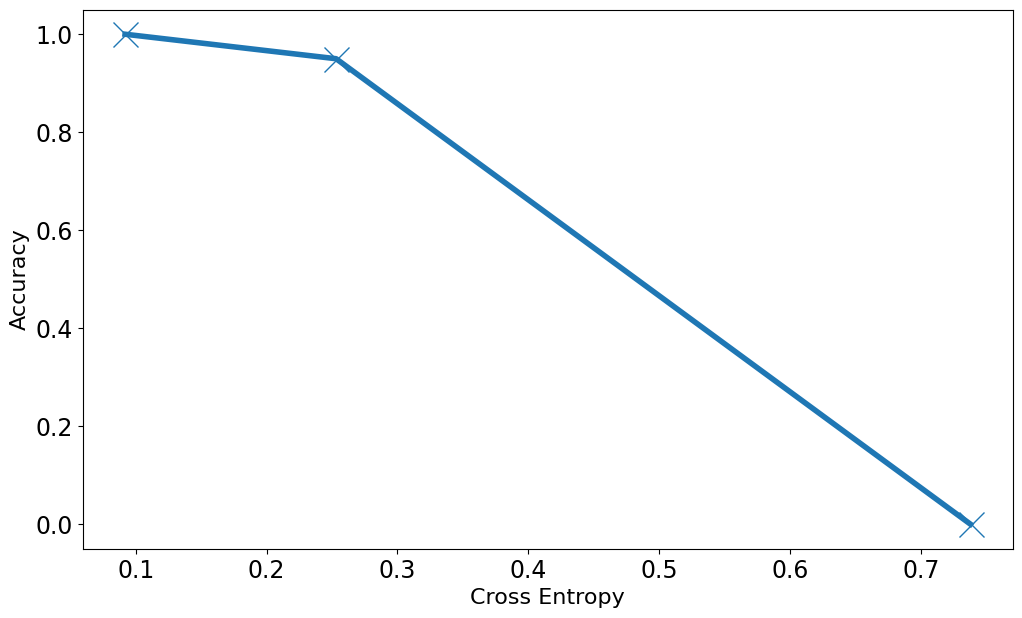

In [4]:
# Hint: not all right and wrong answers are created equally

y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

# high accuracy / moderate cross-entropy
predictions_1 = np.array([0.1, 0.9, 0.8, 0.2, 0.7, 0.3, 0.4, 0.9, 0.85, 0.2, 0.9, 0.1, 0.8, 0.75, 0.1, 0.3, 0.9, 0.2, 0.85, 0.1])

# lower accuracy / lower cross-entropy
predictions_2 = np.array([0.4, 0.6, 0.55, 0.45, 0.65, 0.35, 0.5, 0.6, 0.6, 0.45, 0.7, 0.35, 0.65, 0.5, 0.4, 0.5, 0.6, 0.4, 0.6, 0.35])

# low accuracy / high cross-entropy
predictions_3 = np.array([0.9, 0.2, 0.3, 0.8, 0.2, 0.9, 0.9, 0.3, 0.3, 0.8, 0.1, 0.9, 0.2, 0.3, 0.9, 0.7, 0.2, 0.8, 0.3, 0.9])


preds = [predictions_1, predictions_2, predictions_3]

cross_entropies = [cross_entropy(y_pred, y_true) for y_pred in preds]
accuracies = [accuracy_score(y_true, y_pred > 0.5) for y_pred in preds]
pd.Series(accuracies, index=cross_entropies).plot(
    style='-x', figsize=(12,7), fontsize=17,
    markersize=18, linewidth=4
)
plt.xlabel('Cross Entropy', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Problem 1: Cross Validation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

### Part 1: Generate some data
 - Generate data with 1024 points and 10 features.
 - Create targets that are linear combinations of the 10 features and add some noise.
 - Split the data into train/test 80/20 percent.

In [ ]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 0, 2, 0, 4, 0, 0])  # notice, there are zeros!
noise_amplitude = 5

# num_variables = ...

# x = ...
# y = ...

# x_train, x_test = ...
# y_train, y_test = ...

# del x, y

### Part 2: cross validation
Here we will cross validate our data to find the best set of parameters for `Lasso` regression. We will tune the regularization strength (`alpha`) and whether we fit an intercept to the data.
 - For each set of parameters find fit an estimator
 - Calculate the mean squared error on the test set
 - store the results (both the MSE and the parameters) so we can do analysis later

In [ ]:
# alphas = # make a list of alphas here
# fit_intercepts = # make a list of the two values for `fit_intercept here`

# everything below to be removed
# for all possible combinations, compute necessary metrics
results = []
# put code here

### Part 3: Analysis
 - for each value of `fit_intercept` plot the `MSE` and `r2` scores as a function of alpha.
 - What is the overall best combination of parameters

In [ ]:
df = pd.DataFrame(results)  # not needed, but maybe handy
# your plotting code here

# Problem 2: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



In [ ]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)


# your code here,
# split data into x_train, x_test, y_train, y_test

In [ ]:
x_train.shape, y_train.shape

In [ ]:

# fit linear regression here and calculate MSE
# put code here

In [ ]:
# Show that the coefficients are all close the "real" ones used to generate the data
# put code here

In [ ]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='png'))


In [ ]:
# Now we will use keras to solve the same problem
#input_data = Input(shape=FIXME)
# add model definition here

In [ ]:
K.clear_session()
# build model here
#keras_lin_reg = Model(...)
# don't forget to compile model here

# plot the model

## How many parameters does the model have?
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [ ]:
# ADD CODE HERE

## Fit the model and calculate the MSE

In [ ]:
# fit the model here

# calculate mse
# mean_squared_error(...

## get the coefficients and compare them to the real coefficients

In [ ]:
# add code here

## Now we will add some regularization

In [ ]:
from tensorflow.keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=.1)
 # Dense(...) -> Dense(..., kernel_regularizer=regularizer)

#keras_ridge_model = Model(...


In [ ]:
# fit the model and calculate the MSE
#mean_squared_error(...

In [ ]:
# find the coefficients and compare them to the real ones
# keras_ridge_coefs = ....
pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
pd.Series(ridge.coef_, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

In [ ]:
# compare coefficients from various methods
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

## In fact, given the zero coefficients, LASSO might have been a better model.
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [ ]:
from sklearn.linear_model import Lasso

#lasso_coefs = ...
pd.Series(lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

In [ ]:
regularizer = l1_l2(l1=0.1, l2=0)  # to be removed

#keras_lasso_model = ...


In [ ]:

#keras_lasso_coefs = ...

In [ ]:
# compare all the coefficients
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso.coef_, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(lin_reg.coef_, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

## Comment on the results

In [ ]:
# Safe to restart here

# Problem 3: Custom Loss Functions
### In this problem we will explore the use of custom loss function to better capture desired behavior in a model.
### In particular, we will examine the tradeoff between false positives and true positives

In [ ]:
# safe to restart here

In [ ]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# Insert necessary imports here

## Part 0: Data preparation
 - ### Load the `mnist` data and subset the data only to the classes `4` and `9`
 - ### This way we have a binary classification task for simplicity

In [ ]:
from tensorflow.keras.utils import to_categorical

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    # insert code here:
    # new_x should be x where y is either 4 or 9
    # new_y should be true if y == 4 and False is y = 9
    # return new_x, new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_train.shape)

## Part 1: fit logistic regression in `scikit-learn` and compute the true positive and false positive rates

In [ ]:
%%time
# insert code here

In [ ]:
# put your code here
total_predicted_pos ...
total_true_pos = ...
correct_predicted_pos = ...

tpr =  ...
fpr =  ...
fnr =  ...
print('false positive rate {:.3f}'.format(fpr))
print('false negative rate {:.3f}'.format(fnr))

## Part 2: A custom loss function
### Write a function that returns a custom loss function
### As a shortcut, we can modify the loss function to be
### $J(\theta )$=`regular crossentropy `  $\times$  $\alpha$

### where
 - ### $\alpha=$ 1 + `weight_factor` (a number greater than 0) for the positive class (`y=1`)
 - ### $\alpha=$ `1` for the negative class (`y=0`)

### Like this we can over weight how much we care about positive examples.

# $ \\ $
## Function
### Inputs:
 - ### `weight_factor`: the multiplicative factor for how much to weight errors in the `1` class over `0`

### Output:
 - ### a function that has inputs `(y_true, y_pred)` that is a viable keras loss function.


In [ ]:
def get_loss_function(weight_factor):
    def my_cross_entropy(y_true, y_pred):
        #insert code here
    return my_cross_entropy


## Part 3: Fit Models with Different `weight_factors`
## Steps
 - ### For values in `np.linspace(0, 20, 50)` fit logistic regression in keras.
 - ### For each model compute the true positive and false positive rate
 - ### Make a plot of true positives and false positives as a function of `weight_factor`
 - ### Make a plot of true positives as a function of false positives

In [ ]:
res = {}
for wt in np.linspace(0, 20, 50):
    K.clear_session()
    digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
    output = ...
    model = ...
    # calculate metrics here and save them in `res`

In [ ]:
# put plotting code here
# true positive and false positives as a function of wt

In [ ]:
# true positives as a function of false positives

## Part 4: Thresholding vs Loss Function
### What is the difference between using regular crossentropy and changing thresholds vs changing the loss function?
### Typically, we consider anything with a predicted probability of 0.5 or above to be a positive example. What if we change this number?

## Steps:
 - ### Fit logistic regression in keras with the regular (crossentropy) loss function
 - ### Find the false positive and true positive rates as a function of the `threshold` for which we consider a positive example.
 - ### Make a plot of false positives as a function of true positives for this thresholding method.
 - ### On the same axes, plot the old curve of false positives as a function of true positives
 - ### Comment on what you find- what are the advantages and disadvantages of these two methods.

In [ ]:
K.clear_session()
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
# your code goes here

In [ ]:
pred_proba = model.predict(x_test)


In [ ]:
# your code here

In [ ]:
# comments here

In [ ]:
# safe to restart

# Problem 4: Custom Regularization

In [ ]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# necessary imports here

In [ ]:
np.random.seed(1234)
n_points = 2048

x = np.vstack([np.random.randn(n_points) + ii for ii in np.arange(-3, 3)]).T
real_coefs = np.array([1.4, 0.9, .1, -3, 2.2, -1.3])
y = x.dot(real_coefs) + .5 * np.random.randn(n_points)

In [ ]:
x.shape

In [ ]:
pd.Series(y).hist(bins=30, figsize=(12,8))
plt.xlabel('y', fontsize=24)
plt.ylabel('counts', fontsize=24)

## A new regularization
Sometimes, in the social science and in low-data situations a good rule of thumb is that instead of doing linear regression to find the coefficients, we can assume that all the coefficients are the same!

We will implement a variation on this by penalizing the `variance` of the coefficients, instead of the size.

__NOTE__: this is not a good thing to do in this situation- we have coefficients of different sign!

In this problem we will first solve linear regression with keras. Then we will add a custom regularizer to penalize the variance, and see what the effect are.

# $ \\ $
# $ \\ $
## Part 0: Solve the problem with no regularization
### Steps:
 - ### Partition the data into train/test
 - ### Fit linear regression in keras with no regularization
 - ### Find the `mse` for the test set this model
 - ### Examine the coefficients and make sure they look correct

In [ ]:
# partition the data

In [ ]:
# fit the data

In [ ]:
from sklearn.metrics import mean_squared_error
# calculate MSE

In [ ]:
# examine coefs and make sure they look right

## Part 1: Add Regularization
## Steps:
 - ### Make a function that given a `weight_factor` returns a well-formed keras regularization function that penalizes the variance of coefficients by this factor.
 - ### Fit a model with this regularizer with a `weight_factor` of `1.0`.
 - ### Calculate the `mse` on the test set and examine the coefficients.

__Note__: the coefficients should be closer together. Are they?


In [ ]:
def make_reg_function(wt_factor):
    def my_reg(weight_matrix):
        # your code here
    return my_reg



In [ ]:
K.clear_session()
inpts = Input(shape=(x_train.shape[1],))
# make and fit a model

In [ ]:
# examine coefs

In [ ]:
# calculate MSE

## Part 2: Turn up the Regularization
## Steps
 - ### Repeat part 1 with the weight factor turned up to many times its initial value
 - ### Calculate the `mse` on the test set
 - ### examine the coefficients and comment
 - ### compare these results to the best constant guess for `y`.

In [ ]:
K.clear_session()
# make and fit a model with MUCH more regularization

In [ ]:
# look at the coefs

In [ ]:
# calculate MSE

## This is not bad.
 - What would the MSE of the best CONSTANT guess for `y`?

In [ ]:
# your code here

## Comments
